Rafeed Sultaan (s3763175)
# Computational Machine Learning Assignment-2
## TASK-2: Detecting Traffic Sign-Types

## Loading the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Lambda, Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras import regularizers, optimizers
from PIL import Image
import glob




## Loading the Traffic Sign Dataset

#### Extracting the Traffic Signs Dataset

In [2]:
with zipfile.ZipFile('./trafficsigns_dataset-1.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

#### Loading the Dataset into dataframe

In [3]:
from PIL import Image
import glob

image_list = []
for filepath in glob.glob('trafficsigns_dataset/*/*/*.png', recursive=True):
   
    filename = filepath.split("/")[-1]
    label = filepath.split("/")[-2]
    image_list.append((filepath, label))
                      
# Create a data frame
dataframe = pd.DataFrame(data=image_list, columns=['image_path','label'])

#### Checking DataFrame dataframe

In [4]:
dataframe.head()

,image_path,label
0,trafficsigns_dataset/triangle/warning/01085_00...,warning
1,trafficsigns_dataset/triangle/warning/01423_00...,warning
2,trafficsigns_dataset/triangle/warning/00947_00...,warning
3,trafficsigns_dataset/triangle/warning/00869_00...,warning
4,trafficsigns_dataset/triangle/warning/00454_00...,warning


#### Unique Traffic Signs in the original Dataset

In [5]:
sign_labels = dataframe['label'].unique()
sign_labels.sort()
print(sign_labels)

['bicycle' 'continue' 'crossing' 'giveway' 'laneend' 'limitedtraffic'
 'noentry' 'noparking' 'parking' 'rightofway' 'roundabout' 'speed' 'stop'
 'trafficdirective' 'traveldirection' 'warning']


## Total number of images in each sign label

In [6]:
print ("Number of bicycle signs " , len(dataframe[dataframe['label']=='bicycle']))
print ("Number of continue signs  " , len(dataframe[dataframe['label']=='continue']))
print ("Number of crossing signs " , len(dataframe[dataframe['label']=='crossing']))
print ("Number of giveway signs  ",len(dataframe[dataframe['label']=='giveway']))
print ("Number of laneend signs ", len(dataframe[dataframe['label']=='laneend']))

print ("Number of limitedtraffic signs " , len(dataframe[dataframe['label']=='limitedtraffic']))
print ("Number of noentry signs  " , len(dataframe[dataframe['label']=='noentry']))
print ("Number of noparking signs " , len(dataframe[dataframe['label']=='noparking']))
print ("Number of parking signs  ",len(dataframe[dataframe['label']=='parking']))
print ("Number of rightway signs ", len(dataframe[dataframe['label']=='rightofway']))

print ("Number of roundabout signs " , len(dataframe[dataframe['label']=='roundabout']))
print ("Number of speed signs  " , len(dataframe[dataframe['label']=='speed']))
print ("Number of stop signs " , len(dataframe[dataframe['label']=='stop']))
print ("Number of trafficdirectivesigns  ",len(dataframe[dataframe['label']=='trafficdirective']))
print ("Number of traveldirection signs ", len(dataframe[dataframe['label']=='traveldirection']))

print ("Number of warning signs ", len(dataframe[dataframe['label']=='warning']))

Number of bicycle signs  285
Number of continue signs   199
Number of crossing signs  95
Number of giveway signs   231
Number of laneend signs  118
Number of limitedtraffic signs  125
Number of noentry signs   375
Number of noparking signs  242
Number of parking signs   276
Number of rightway signs  282
Number of roundabout signs  98
Number of speed signs   316
Number of stop signs  43
Number of trafficdirectivesigns   195
Number of traveldirection signs  124
Number of warning signs  695


## Shuffling the dataframe and checking the dataframe contents

In [7]:
dataframe = shuffle(dataframe)
dataframe.head()

,image_path,label
3598,trafficsigns_dataset/square/continue/00367_000...,continue
2363,trafficsigns_dataset/round/speed/01243_00000.png,speed
513,trafficsigns_dataset/triangle/warning/01537_00...,warning
2204,trafficsigns_dataset/round/speed/01775_00000.png,speed
1300,trafficsigns_dataset/round/noparking/00797_000...,noparking


## Images Inside the Dataset

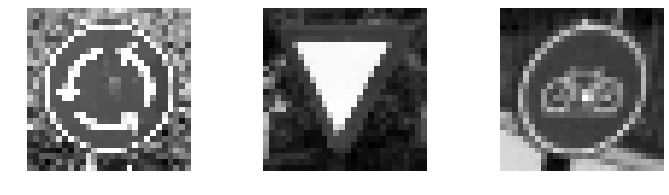

In [8]:
random_image_list = dataframe.loc[np.random.choice(3000, 3),'image_path']
plt.figure(figsize=(12,3))
for i, image_path in enumerate(random_image_list ):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,3,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')  
plt.show()

# Using Holdout Cross Validation
#### Splitting the data into 3 sets of data: train,validation and test sets

In [9]:
##Holdout data test_shapes
trainset, testset = train_test_split(dataframe, test_size=0.2)
trainset, validationset = train_test_split(trainset, test_size=0.2)

#### Printing the shapes of train, validation and test sets

In [10]:
print("Train Set Shape:",trainset.shape)
print("Validation Set Shape:",validationset.shape)
print("Test Set Shape:",testset.shape)

Train Set Shape: (2367, 2)
Validation Set Shape: (592, 2)
Test Set Shape: (740, 2)


#### Storing the number of images in train, validation sets

In [11]:
N_train_images = trainset.shape[0]
N_val_images = validationset.shape[0]

## Train , Validation and Test Generator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=trainset,
    directory='./',
    x_col="image_path",
    y_col="label",
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=validationset,
    directory='./',
    x_col="image_path",
    y_col="label",
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(
    dataframe=testset,
    directory='./',
    x_col="image_path",
    y_col="label",
    target_size=(28, 28),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')

Found 2367 validated image filenames belonging to 16 classes.
Found 592 validated image filenames belonging to 16 classes.
Found 740 validated image filenames belonging to 16 classes.


## Extracting Indepedent TS Dataset

In [13]:
import zipfile
with zipfile.ZipFile('./independent_evaluation_TS_images.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

## Transforming Independent to Grayscale from BGF and Transforming to to 28x28 pixels

In [14]:
import cv2
for filepath in glob.glob('independent_evaluation_TS_images/*/*/*.png', recursive=True):
    img = cv2.imread(filepath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(gray, (28,28) , interpolation = cv2.INTER_AREA)
    img_resized.view
    cv2.imwrite(os.path.join(filepath), img_resized)

## Loading the Independent Dataset

In [15]:
from PIL import Image
import glob

image_list = []
for filepath in glob.glob('independent_evaluation_TS_images/*/*/*.png', recursive=True):
    filename = filepath.split("/")[-1]
    label = filepath.split("/")[-2]
    image_list.append((filepath,label))
                      
# Create a data frame
independentEvaluationData = pd.DataFrame(data=image_list, columns=['image_path','label'])

#### Checking Independent Traffic Signs Dataset

In [16]:

independentEvaluationData.head()

,image_path,label
0,independent_evaluation_TS_images/triangle/warn...,warning
1,independent_evaluation_TS_images/triangle/warn...,warning
2,independent_evaluation_TS_images/triangle/warn...,warning
3,independent_evaluation_TS_images/triangle/warn...,warning
4,independent_evaluation_TS_images/triangle/warn...,warning


#### Checking the quantity of each sign in Independent Traffic Sign Dataset

In [40]:
print ("Number of bicycle signs " , len(independentEvaluationData[independentEvaluationData['label']=='bicycle']))
print ("Number of continue signs  " , len(independentEvaluationData[independentEvaluationData['label']=='continue']))
print ("Number of crossing signs " , len(independentEvaluationData[independentEvaluationData['label']=='crossing']))
print ("Number of giveway signs  ",len(independentEvaluationData[independentEvaluationData['label']=='giveway']))
print ("Number of laneend signs ", len(independentEvaluationData[independentEvaluationData['label']=='laneend']))

print ("Number of limitedtraffic signs " , len(independentEvaluationData[independentEvaluationData['label']=='limitedtraffic']))
print ("Number of noentry signs  " , len(independentEvaluationData[independentEvaluationData['label']=='noentry']))
print ("Number of noparking signs " , len(independentEvaluationData[independentEvaluationData['label']=='noparking']))
print ("Number of parking signs  ",len(independentEvaluationData[independentEvaluationData['label']=='parking']))
print ("Number of rightway signs ", len(independentEvaluationData[independentEvaluationData['label']=='rightofway']))

print ("Number of roundabout signs " , len(independentEvaluationData[independentEvaluationData['label']=='roundabout']))
print ("Number of speed signs  " , len(independentEvaluationData[independentEvaluationData['label']=='speed']))
print ("Number of stop signs " , len(independentEvaluationData[independentEvaluationData['label']=='stop']))
print ("Number of trafficdirectivesigns  ",len(independentEvaluationData[independentEvaluationData['label']=='trafficdirective']))
print ("Number of traveldirection signs ", len(independentEvaluationData[independentEvaluationData['label']=='traveldirection']))

print ("Number of warning signs ", len(independentEvaluationData[independentEvaluationData['label']=='warning']))

Number of bicycle signs  9
Number of continue signs   5
Number of crossing signs  13
Number of giveway signs   6
Number of laneend signs  6
Number of limitedtraffic signs  3
Number of noentry signs   17
Number of noparking signs  10
Number of parking signs   12
Number of rightway signs  11
Number of roundabout signs  18
Number of speed signs   14
Number of stop signs  7
Number of trafficdirectivesigns   18
Number of traveldirection signs  12
Number of warning signs  17


#### Checking the Images in Independent Dataset

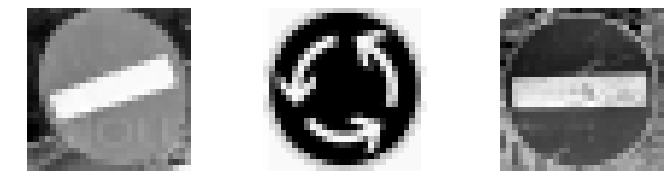

In [18]:
random_image_list = independentEvaluationData.loc[np.random.choice(100, 3),'image_path']
plt.figure(figsize=(12,3))
for i, image_path in enumerate(random_image_list ):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,3,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')  
plt.show()

#### Independent Test Data Generator

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
independentTestData_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
batch_size = 16

independentTestDataGenerator = independentTestData_datagen.flow_from_dataframe(
        dataframe=independentEvaluationData,
        directory='./',
        x_col="image_path",
        y_col="label",
        target_size=(28, 28),
        batch_size=batch_size,
        shuffle = False,
        class_mode='categorical')

Found 178 validated image filenames belonging to 16 classes.


#### evaluateModel() function prints Confution Matrix and Classification Report based on the test data from original traffic sign dataset

In [20]:
def evaluateModel(model):
    test_generator.reset()
    Y_pred = model.predict_generator(test_generator)
    y_pred= np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_generator.classes, y_pred))
    print('Classification Report')
    target_names = ['bicycle' ,'continue' ,'crossing' ,'giveway' ,'laneend' ,'limitedtraffic',
    'noentry', 'noparking' ,'parking' ,'rightofway' ,'roundabout', 'speed', 'stop',
    'trafficdirective' ,'traveldirection' ,'warning']
    print(classification_report(test_generator.classes, y_pred, target_names=target_names))

#### displayPlotsMLP() function displays the Multilayer Perceptron Training,Validation Accuracy/Loss vs Epoch graphs

In [21]:
def displayPlotsMLP(history):
    ## Accuracy Graph
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    ## Loss Graph
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

#### displayPlots() function displays the CNN Training,Validation Accuracy/Loss vs Epoch graphs

In [22]:
def displayPlots(history):
    ## Accuracy Graph
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    ##Loss Graph
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

#### independentEvaluation() function prints Confusion Matrix and Classification report based on the model

In [23]:
def independentEvaluation(model,history):
    independentTestDataGenerator.reset()
    Y_pred = model.predict_generator(independentTestDataGenerator)
    y_pred= np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(independentTestDataGenerator.classes, y_pred))
    print('Classification Report')
    target_names = ['bicycle' ,'continue' ,'crossing' ,'giveway' ,'laneend' ,'limitedtraffic',
    'noentry', 'noparking' ,'parking' ,'rightofway' ,'roundabout', 'speed', 'stop',
    'trafficdirective' ,'traveldirection' ,'warning']
    print(classification_report(independentTestDataGenerator.classes, y_pred, target_names=target_names))

# Multi-Layer Perceptron Model (MLP)

### MLP Model with 2 Hidden Layers, SGD Optimizer

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
______________________________________________

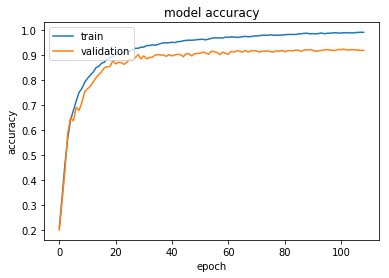

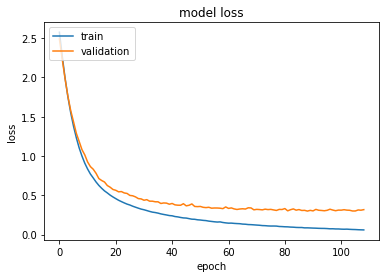

Confusion Matrix
[[ 2  0  0  0  0  0  4  0  0  2  0  0  0  0  1  0]
 [ 0  2  0  1  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 1  0  0  0  0  0  4  0  0  1  0  0  0  0  0  7]
 [ 0  0  0  1  0  0  1  3  0  0  0  0  0  0  0  1]
 [ 0  3  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  2]
 [ 0  0  0  1  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  6  2  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0  0  0  3  5]
 [ 0  0  0  0  0  0  3  2  0  3  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  2 12  0  1  0  0  0  3]
 [ 0  0  0  1  0  0  2  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  4  1  0  1  0  0  0  0  1  0]
 [ 0  1  0  1  2  1  2  0  0  2  1  2  0  4  0  2]
 [ 0  1  0  0  0  0  6  1  2  0  0  0  0  0  1  1]
 [ 0  1  0  0  2  0  0  0  0  0  0  0  0  0  0 14]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.67      0.22      0.33         9
        continue       0.25

In [24]:
input_ = Input(shape=(28, 28, 3))

input_slice = Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))(input_)

x = Flatten()(input_slice) # This will convert the 28x28 input to a vector of dimension 784

# First Hidden layer
h = Dense(64)(x)
h = Activation('relu')(h)

# Second Hidden layer
h2 = Dense(64)(h)
h2 = Activation('relu')(h2)

# Output layer
out_ = Dense(16)(h2)
out_ = Activation('softmax')(out_)
MLP = Model(inputs=input_, outputs=out_) # Setup the model

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
MLP.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

MLP.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
# Fit the model
history=MLP.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )
# Evaluate the model on the original dataset
evaluateModel(MLP)
# Display Training Validation Accuracy and Loss Graphs
displayPlotsMLP(history)
# Evaluate the model on the independent dataset
independentEvaluation(MLP,history)

## CNN Model

### CNN Model with 2 Hidden Layers, SGD Optimizer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0

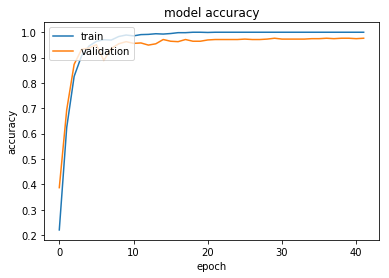

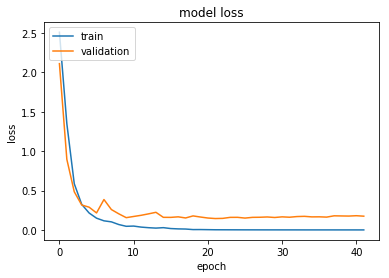

Confusion Matrix
[[ 2  0  0  0  0  0  0  1  0  0  0  0  0  2  2  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  1]
 [ 1  0  3  0  0  0  0  0  0  1  0  0  0  0  0  8]
 [ 0  0  0  1  0  0  0  2  0  1  0  0  0  0  0  2]
 [ 0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  2  0  2  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  7  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 13  0  0  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  5  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  4  5  0  4  1  2]
 [ 0  0  0  0  0  0  2  0  1  2  0  0  0  0  6  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.50      0.22      0.31         9
        continue       0.00

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Lambda, Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras import regularizers, optimizers

CNN_with_2HiddenLayers = Sequential()

# input
CNN_with_2HiddenLayers.add(Input(shape=(28, 28, 3)))

CNN_with_2HiddenLayers.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_with_2HiddenLayers.add(Conv2D(32, (3, 3)))
CNN_with_2HiddenLayers.add(Activation('relu'))
CNN_with_2HiddenLayers.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_with_2HiddenLayers.add(Conv2D(32, (3, 3)))
CNN_with_2HiddenLayers.add(Activation('relu'))
CNN_with_2HiddenLayers.add(MaxPooling2D(pool_size=(2, 2)))


# MLP
CNN_with_2HiddenLayers.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_with_2HiddenLayers.add(Dense(64))
CNN_with_2HiddenLayers.add(Activation('relu'))
CNN_with_2HiddenLayers.add(Dense(16))
CNN_with_2HiddenLayers.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
CNN_with_2HiddenLayers.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[categorical_accuracy])

CNN_with_2HiddenLayers.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_with_2HiddenLayers.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )

# Evaluate the model on the original dataset
evaluateModel(CNN_with_2HiddenLayers)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evaluation on Independent Data
independentEvaluation(CNN_with_2HiddenLayers,history)
               

### CNN Model with 2 Hidden Layers, Dropout SGD Optimizer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)         

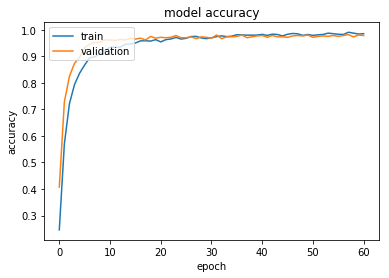

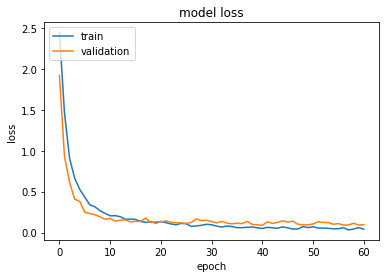

Confusion Matrix
[[ 3  0  1  0  0  0  0  0  0  0  0  0  0  2  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  1  0  2  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  3  0]
 [ 0  0  0  1  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  3 11  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  2  0  0  0  2  0  0  3  1 10  0  0]
 [ 0  1  0  0  1  0  2  0  1  1  1  0  0  0  4  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.75      0.33      0.46         9
        continue       0.00

In [26]:
CNN_With_2HiddenLayers_WithDropout= Sequential()

# input
CNN_With_2HiddenLayers_WithDropout.add(Input(shape=(28, 28, 3)))

CNN_With_2HiddenLayers_WithDropout.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_2HiddenLayers_WithDropout.add(Conv2D(32, (3, 3)))
CNN_With_2HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_2HiddenLayers_WithDropout.add(Conv2D(32, (3, 3)))
CNN_With_2HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout.add(MaxPooling2D(pool_size=(2, 2)))



# MLP
CNN_With_2HiddenLayers_WithDropout.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_2HiddenLayers_WithDropout.add(Dense(64))
CNN_With_2HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout.add(Dropout(0.5))
CNN_With_2HiddenLayers_WithDropout.add(Dense(16))
CNN_With_2HiddenLayers_WithDropout.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
CNN_With_2HiddenLayers_WithDropout.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[categorical_accuracy])

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
CNN_With_2HiddenLayers_WithDropout.summary()
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_2HiddenLayers_WithDropout.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )
# Evaluate the model on the original dataset
evaluateModel(CNN_With_2HiddenLayers_WithDropout)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evaluate on the independent dataset
independentEvaluation(CNN_With_2HiddenLayers_WithDropout,history)

### CNN Model with 2 Hidden Layers, Dropout,ADAM Optimizer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)         

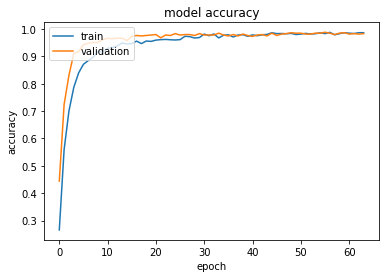

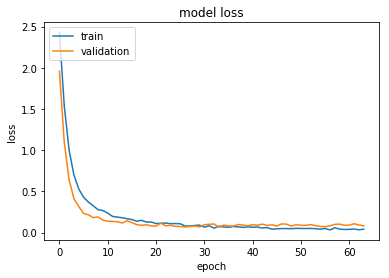

Confusion Matrix
[[ 3  0  0  0  0  0  0  1  0  0  0  0  3  2  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  3  1]
 [ 1  0  2  0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  4  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  9  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  1  0  3  0  0  0  0  2  1  8  3  0]
 [ 0  2  0  1  0  0  2  0  2  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.60      0.33      0.43         9
        continue       0.00

In [27]:


CNN_With_2HiddenLayers_WithDropout_ADAM= Sequential()

# input
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Input(shape=(28, 28, 3)))

CNN_With_2HiddenLayers_WithDropout_ADAM.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Conv2D(32, (3, 3)))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Conv2D(32, (3, 3)))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(MaxPooling2D(pool_size=(2, 2)))



# MLP
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Dense(64))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Dropout(0.5))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Dense(16))
CNN_With_2HiddenLayers_WithDropout_ADAM.add(Activation('softmax'))

CNN_With_2HiddenLayers_WithDropout_ADAM.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

CNN_With_2HiddenLayers_WithDropout_ADAM.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=30,verbose=1,restore_best_weights=True)
history=CNN_With_2HiddenLayers_WithDropout_ADAM.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )
# Evaluate the model on the original dataset
evaluateModel(CNN_With_2HiddenLayers_WithDropout_ADAM)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evaluate on Independent Data
independentEvaluation(CNN_With_2HiddenLayers_WithDropout_ADAM,history)

### CNN Model with 2 Hidden Layers, Dropout, ADAM Optimizer, L1 Regularization

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)         

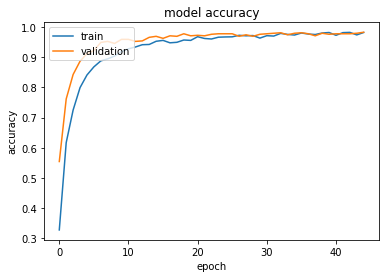

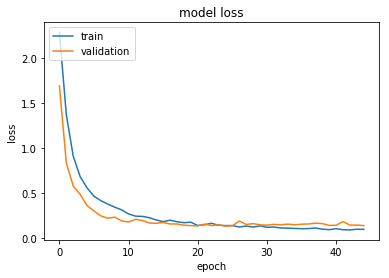

Confusion Matrix
[[ 3  0  0  0  0  0  1  0  0  0  0  1  0  1  3  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  2  2]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  5  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  1  0  1  0  0  1  1  5  1  6  0  2]
 [ 0  1  0  1  0  0  3  0  1  1  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.60      0.33      0.43         9
        continue       0.00

In [28]:




CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg= Sequential()

# input
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Input(shape=(28, 28, 3)))

CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l1(0.001)))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Conv2D(32, (3, 3)))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(MaxPooling2D(pool_size=(2, 2)))



# MLP
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Dense(64))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Dropout(0.5))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Dense(16))
CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.add(Activation('softmax'))

CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )
# Evaluate the model on the original dataset
evaluateModel(CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evalution on Independent Data
independentEvaluation(CNN_With_2HiddenLayers_WithDropout_ADAM_L1reg,history)

### CNN Model with 2 Hidden Layers, Dropout, ADAM Optimizer, L2 Regularization

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_19 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)         

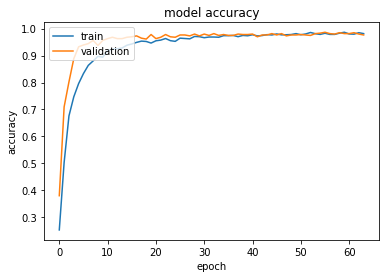

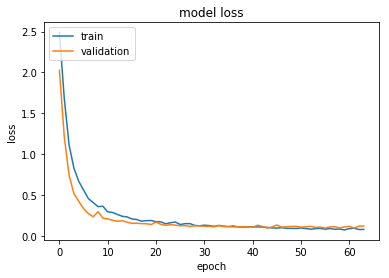

Confusion Matrix
[[ 5  0  0  0  0  0  0  0  0  0  0  1  1  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  1]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  4  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  2 10  1  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  1  0  9  0  5  0  1]
 [ 0  0  0  0  0  0  1  3  1  1  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.83      0.56      0.67         9
        continue       0.00

In [29]:
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg= Sequential()

# input
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Input(shape=(28, 28, 3)))

CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l1(0.001)))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Conv2D(32, (3, 3)))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(MaxPooling2D(pool_size=(2, 2)))



# MLP
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Dense(64))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Activation('relu'))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Dropout(0.5))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Dense(16))
CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.add(Activation('softmax'))

CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )
# Evaluate the model on the original dataset
evaluateModel(CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evalution on Independent Data
independentEvaluation(CNN_With_2HiddenLayers_WithDropout_ADAM_L2reg,history)

### CNN Model with 3 Hidden Layers, SGD Optimizer

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_6 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_23 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_24 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)         

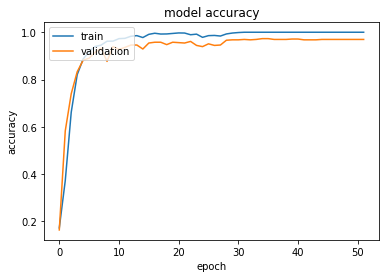

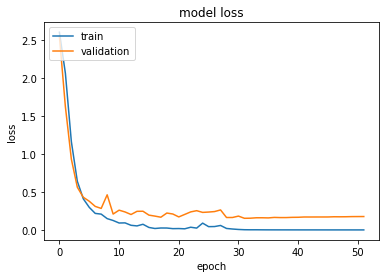

Confusion Matrix
[[ 2  0  0  0  0  0  0  0  0  2  0  0  1  2  2  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  1  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  1  0  0  0  3  0  1  0  0  0  0  0  1]
 [ 0  5  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  1  0  2  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  3  0  1]
 [ 0  0  0  0  0  0  0  4  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  6  0  0  1  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0 11  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 1  0  0  0  0  0  1  0  0  0  2  2  0  4  0  8]
 [ 0  1  0  0  0  0  2  0  1  2  0  0  0  0  5  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.50      0.22      0.31         9
        continue       0.00

In [30]:


CNN_With_3HiddenLayers = Sequential()

# input
CNN_With_3HiddenLayers.add(Input(shape=(28, 28, 3)))

CNN_With_3HiddenLayers.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_3HiddenLayers.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers.add(Activation('relu'))
CNN_With_3HiddenLayers.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_3HiddenLayers.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers.add(Activation('relu'))
CNN_With_3HiddenLayers.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3
CNN_With_3HiddenLayers.add(Conv2D(64, (3, 3)))
CNN_With_3HiddenLayers.add(Activation('relu'))
CNN_With_3HiddenLayers.add(MaxPooling2D(pool_size=(2, 2)))

# MLP
CNN_With_3HiddenLayers.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_3HiddenLayers.add(Dense(64))
CNN_With_3HiddenLayers.add(Activation('relu'))
CNN_With_3HiddenLayers.add(Dense(16))
CNN_With_3HiddenLayers.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
CNN_With_3HiddenLayers.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[categorical_accuracy])

CNN_With_3HiddenLayers.summary()
# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_3HiddenLayers.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )

# Evaluate the model on the original dataset
evaluateModel(CNN_With_3HiddenLayers)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evaluation on Independent Data
independentEvaluation(CNN_With_3HiddenLayers,history)


### CNN Model with 3 Hidden Layers, Dropout, SGD Optimizer

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_7 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_28 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_29 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)         

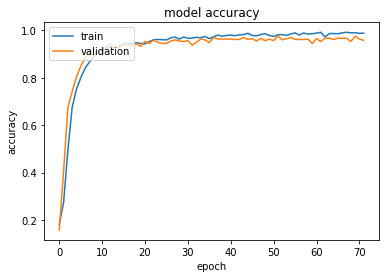

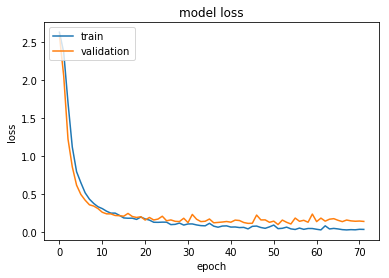

Confusion Matrix
[[ 3  0  0  0  0  1  0  0  0  0  0  2  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  3]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 12]
 [ 0  0  0  3  0  0  0  1  0  0  0  0  0  0  0  2]
 [ 0  2  0  0  2  0  0  0  0  0  0  0  0  1  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  4  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0 12  3  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  2  0  0  0  9  0  0  0  2]
 [ 1  0  0  0  0  0  2  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  1  1  2  1  0  0  0  3  0  5  2  3]
 [ 0  0  0  3  0  0  2  1  0  0  0  0  0  0  2  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.75      0.33      0.46         9
        continue       0.00

In [31]:
CNN_With_3HiddenLayers_WithDropout = Sequential()

# input
CNN_With_3HiddenLayers_WithDropout.add(Input(shape=(28, 28, 3)))

CNN_With_3HiddenLayers_WithDropout.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_3HiddenLayers_WithDropout.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_3HiddenLayers_WithDropout.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3
CNN_With_3HiddenLayers_WithDropout.add(Conv2D(64, (3, 3)))
CNN_With_3HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout.add(MaxPooling2D(pool_size=(2, 2)))

# MLP
CNN_With_3HiddenLayers_WithDropout.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_3HiddenLayers_WithDropout.add(Dense(64))
CNN_With_3HiddenLayers_WithDropout.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout.add(Dropout(0.5))
CNN_With_3HiddenLayers_WithDropout.add(Dense(16))
CNN_With_3HiddenLayers_WithDropout.add(Activation('softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
CNN_With_3HiddenLayers_WithDropout.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=[categorical_accuracy])

CNN_With_3HiddenLayers_WithDropout.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_3HiddenLayers_WithDropout.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )

# Evaluate the model on the original dataset
evaluateModel(CNN_With_3HiddenLayers_WithDropout)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evaluation on Independent Data
independentEvaluation(CNN_With_3HiddenLayers_WithDropout,history)


### CNN Model with 3 Hidden Layers, Dropout, ADAM Optimizer

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_8 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_33 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_34 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)         

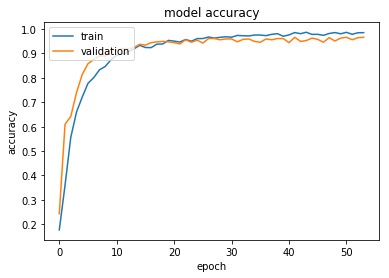

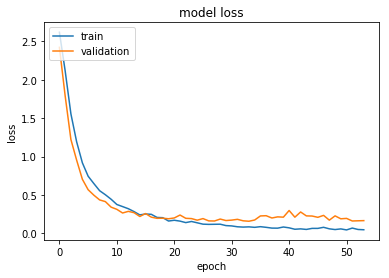

Confusion Matrix
[[ 2  0  1  0  0  0  0  0  2  0  0  0  0  2  2  0]
 [ 1  0  0  0  1  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0 11]
 [ 0  0  0  1  0  0  0  3  0  0  0  0  0  0  0  2]
 [ 0  2  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  4  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  2  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1  0  2  0  6  0  7]
 [ 0  1  0  0  0  0  5  0  1  0  0  0  0  2  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.50      0.22      0.31         9
        continue       0.00

In [32]:
CNN_With_3HiddenLayers_WithDropout_ADAM= Sequential()

# input
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Input(shape=(28, 28, 3)))

CNN_With_3HiddenLayers_WithDropout_ADAM.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3 
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Conv2D(64, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(MaxPooling2D(pool_size=(2, 2)))


# MLP
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Dense(64))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Dropout(0.5))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Dense(16))
CNN_With_3HiddenLayers_WithDropout_ADAM.add(Activation('softmax'))

CNN_With_3HiddenLayers_WithDropout_ADAM.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

CNN_With_3HiddenLayers_WithDropout_ADAM.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_3HiddenLayers_WithDropout_ADAM.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )

# Evaluate the model on the original dataset
evaluateModel(CNN_With_3HiddenLayers_WithDropout_ADAM)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evalution on Independent Data
independentEvaluation(CNN_With_3HiddenLayers_WithDropout_ADAM,history)

### CNN Model with 3 Hidden Layers, Dropout, ADAM Optimizer, L1 Regularizations

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_38 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_39 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 32)         

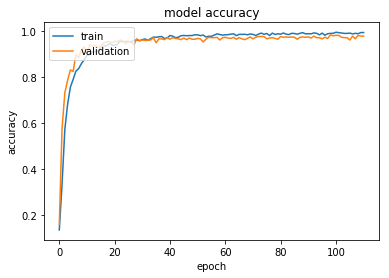

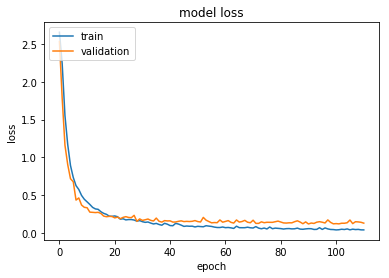

Confusion Matrix
[[ 4  0  0  0  0  0  0  0  0  0  0  0  3  1  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  3]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  4  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 0  4  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  1  0  3  0  0  0  0  3  1  1]
 [ 0  0  0  0  0  0  0  4  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0  4 10  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  8  0  5  0  4]
 [ 0  0  0  2  1  0  3  0  1  0  0  0  1  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 17]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       0.57      0.44      0.50         9
        continue       0.00

In [33]:
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg = Sequential()

# input
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Input(shape=(28, 28, 3)))

CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l1(0.001)))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Conv2D(64, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(MaxPooling2D(pool_size=(2, 2)))

# MLP
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Dense(64))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Dropout(0.5))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Dense(16))
CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.add(Activation('softmax'))

CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )


# Evaluate the model on the original dataset
evaluateModel(CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evalution on Independent Data
independentEvaluation(CNN_With_3HiddenLayers_WithDropout_ADAM_L1Reg,history)

### CNN Model with 3 Hidden Layers, Dropout, ADAM Optimizer, L2 Regularizations

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_10 (Lambda)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_43 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_44 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 32)         

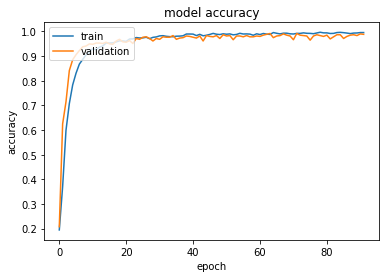

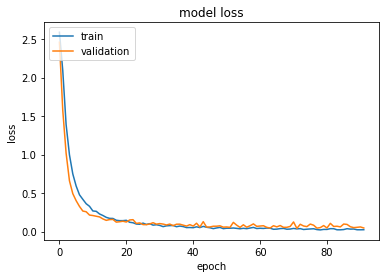

Confusion Matrix
[[ 3  0  0  0  0  0  0  1  0  0  1  0  2  1  0  1]
 [ 0  0  0  1  2  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0  0 10]
 [ 0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  4  0  0  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  3  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  6  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  2]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0 10  0  5]
 [ 0  3  0  0  0  0  2  0  0  0  0  1  0  0  4  2]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 16]]
Classification Report
                  precision    recall  f1-score   support

         bicycle       1.00      0.33      0.50         9
        continue       0.00

In [35]:
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg = Sequential()

# input
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Input(shape=(28, 28, 3)))

CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 
# this is a workaround. Dataloader automatically read one channel image as 3 channel 
#and we use Lambda layer to revert this back. Lambda layer can be used for operation 
#that does not involve trainianble weights

# Conv Layer 1
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Conv2D(32, (3, 3),kernel_regularizer=regularizers.l2(0.001)))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 2 
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Conv2D(32, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(MaxPooling2D(pool_size=(2, 2)))

# Conv Layer 3
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Conv2D(64, (3, 3)))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(MaxPooling2D(pool_size=(2, 2)))

# MLP
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Dense(64))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Activation('relu'))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Dropout(0.5))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Dense(16))
CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.add(Activation('softmax'))

CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[categorical_accuracy])

CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.summary()

# Early Stopping based on validation loss, minimum differece training loss and validation loss is 0.001, epoch 20
monitor=EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=20,verbose=1,restore_best_weights=True)
history=CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=250,
                    verbose=0
                    )


# Evaluate the model on the original dataset
evaluateModel(CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg)
# Display Training Validation Accuracy and Loss Graphs
displayPlots(history)
# Evaluation on Independent Data
independentEvaluation(CNN_With_3HiddenLayers_WithDropout_ADAM_L2Reg,history)